# Hyperbolic heat conduction

$$
C\frac{\partial^2\theta}{\partial{}t^2}+
\frac{\partial\theta}{\partial{}t}=
D\frac{\partial^2\theta}{\partial{}x^2}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Fourier transform solution

## Finite difference solution

In [2]:
def allocate_memory(nx, nt, X, T):
    """ Allocate memory for problem solution. """
    x, dx = np.linspace(-X/2, X/2, nx, retstep=True)
    t, dt = np.linspace(0.0, T, nt, retstep=True)
    
    un = np.zeros(nx)
    um = un.copy()

    return x, t, dx, dt, un, um


def tridiag_matrix(m, nx, l=-1, u=-1):
    """ Create LHS matrix for problem solution. """
    ld = np.diag(l * np.ones(nx - 1), -1)
    ud = np.diag(u * np.ones(nx - 1), +1)
    md = np.diag(m * np.ones(nx))
    return ld + md + ud


def solve_nonrelativistic(nx, nt, X, T, D):
    """ Solve non-relativistic heat equation. """
    ret = allocate_memory(nx, nt, X, T)
    x, t, dx, dt, un, _ = ret
    
    beta = dx ** 2 / (D * dt)
    A = tridiag_matrix(beta + 2, nx)
    
    pos0 = 4 * nx // 10
    pos1 = 6 * nx // 10
    un[pos0:pos1] = 1
    u0 = un.copy()
    
    for step in range(nt):
        un = np.linalg.solve(A, beta * un)
        
    return x, un, u0


def solve_relativistic(nx, nt, X, T, D, C):
    """ Solve non-relativistic heat equation. """
    ret = allocate_memory(nx, nt, X, T)
    x, t, dx, dt, un, um = ret
    
    gamma = dx ** 2 / (D * dt)
    alpha = gamma * C / dt

    coef1 = alpha + gamma + 2
    coef2 = 2 * alpha + gamma

    A = tridiag_matrix(coef1, nx)
        
    pos0 = 4 * nx // 10
    pos1 = 6 * nx // 10
    um[pos0:pos1] = 1
    un[pos0:pos1] = 1
    u0 = un.copy()
    
    for step in range(nt):
        uo = np.linalg.solve(A, coef2 * un - alpha * um)
        um = un.copy()
        un = uo

    return x, un, u0


def run_fd_comparison(C, D, X, T, nx, nt):
    """ Run solution comparison with FD discretization. """
    x, u_nr, u_in = solve_nonrelativistic(nx, nt, X, T, D)
    x, u_rl, u_in = solve_relativistic(nx, nt, X, T, D, C)

    plt.close('all')
    plt.style.use('seaborn-white')
    plt.figure(figsize=(8, 6))
    plt.plot(x, u_in, 'k-', label='Initial')
    plt.plot(x, u_rl, 'r-', label='Relativistic')
    plt.plot(x, u_nr, 'b-', label='Non-relativistic')
    plt.legend()
    plt.grid(linestyle=':')

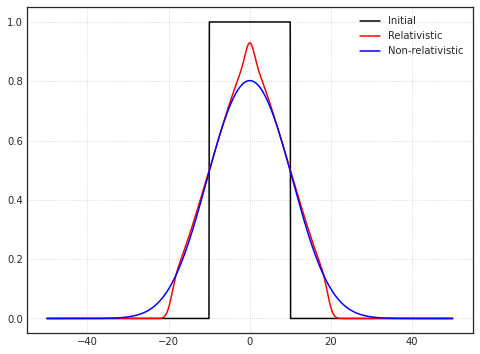

In [9]:
C = 1
D = 10

X = 100
T = 3

nx = 1000
nt = nx // 10

run_fd_comparison(C, D, X, T, nx, nt)

In [4]:
C = 1 / 1000000
D = 50 / (7800 * 600)
D / C

10.683760683760685

## Finite volume solution

$$
\theta^{(\tau)}=A^{-1}(b\theta^{(0)}-c\theta^{(-1)})
$$

In [5]:
# nx = 500
# nt = 5000

# c = 300_000_000
# L = 150_000_000_000
# T = 500

# alpha = 0

# x, dx = np.linspace(0, L, nx, retstep=True)
# t, dt = np.linspace(0, T, nt, retstep=True)

# un = np.zeros(nx)
# um = un.copy()



# v = dx / dt
# beta1 = pow(1 / c, 2)
# beta2 = dx * v / alpha

# coef1 = 2 + beta1 + beta2
# coef2 = 2 * beta1 + beta2

# ld = np.diag(-np.ones(nx - 1), -1)
# ud = np.diag(-np.ones(nx - 1), +1)
# md = np.diag(coef1 * np.ones(nx))
# A = ld + md + ud

# rt = 0.2

# plt.close('all')
# plt.style.use('seaborn-white')
# plt.figure(figsize=(8, 6))

# for step in range(nt):
#     un[nx//2] = 1
#     um[nx//2] = 1
    
#     if not step % int(rt * nt):
#         plt.plot(un, label=F'Step {step}')
    
#     uo = np.linalg.solve(A, coef2 * un - beta1 * um)
#     um = un.copy()
#     un = uo
    
# plt.plot(un, label=F'Step {nt}')
# plt.grid(linestyle=':')
# _ = plt.legend(loc=1)

## Compare methods